In [26]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [82]:
config = {}

config["image_size"] = 200
config["patch_size"] = 16
config["num_channels"] = 3

In [83]:
image = cv2.imread('Dataset/Dog_Cat/test/21.jpg',cv2.IMREAD_COLOR)
image = cv2.resize(image,(config["image_size"], config["image_size"]), 1)

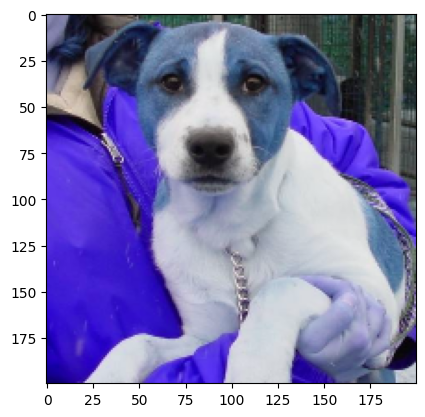

In [84]:
plt.imshow(image)

In [85]:
from tensorflow.image import extract_patches
patches = extract_patches(images=tf.expand_dims(image,axis=0),
                         sizes=[1, config['patch_size'], config['patch_size'], 1],
                         strides=[1, config['patch_size'], config['patch_size'],1],
                         rates=[1, 1, 1, 1],
                         padding='VALID')
patches.shape

TensorShape([1, 12, 12, 768])

In [86]:
patches = tf.reshape(patches,(patches.shape[0],-1,768))
patches.shape

TensorShape([1, 144, 768])

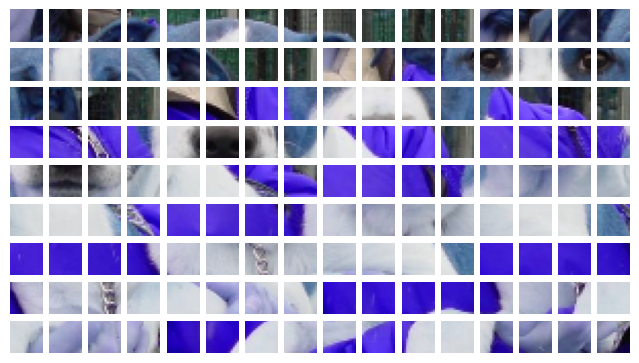

In [90]:
plt.figure(figsize=(8, 8))

for i in range(patches.shape[1]):
    ax = plt.subplot(16, 16, i+1)
    plt.imshow(tf.reshape(patches[0, i, :], (16, 16, 3)))
    plt.axis("off")